Decision Tree Regression Tutorial 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
car_age=np.random.randint(0,15,1000)
mileage=np.random.randint(100,2000,1000)
engine_size=np.random.uniform(1.0,4.5,1000)
price=50000-(car_age*2000)-(mileage*0.05)+(engine_size*5000)+np.random.normal(0,200, 1000)
df=pd.DataFrame({"Car_Age":car_age,"Mileage":mileage,"Engine_Size":engine_size, "Price":price})

Base RMSE: 547.2163544323746


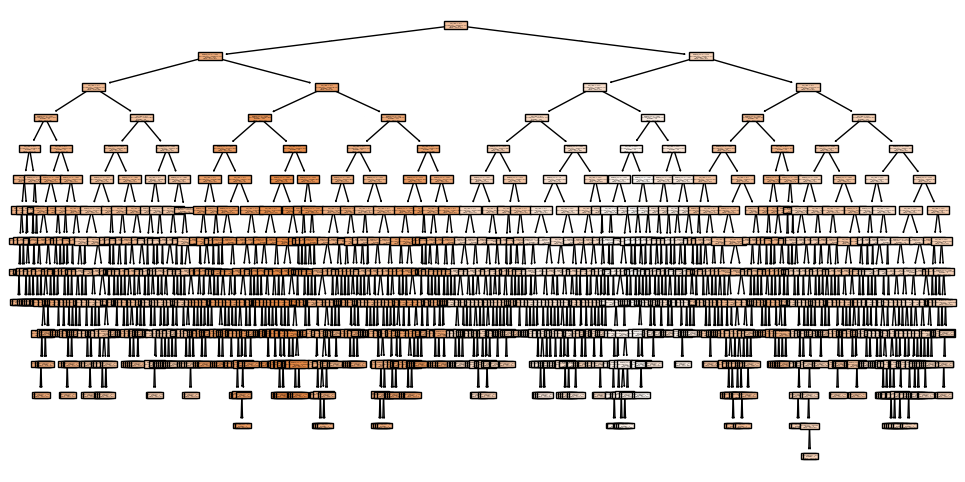

In [ ]:
x=df.drop(columns=["Price"])
y=df["Price"]
a,b,c,d=train_test_split(x,y,test_size=0.2,random_state=1)
model=DecisionTreeRegressor(random_state=1)
model.fit(a,c)
pred=model.predict(b)
base_rmse=np.sqrt(mean_squared_error(d, pred))
print("Base RMSE:", base_rmse)
plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=x.columns, filled=True)
plt.show()

In [ ]:
for i in x.columns:
    x_=x.copy()
    x_[i]=np.log1p(x_[i])
    a,b,c,d=train_test_split(x_,y,test_size=0.2,random_state=1)
    model.fit(a,c)
    pred=model.predict(b)
    rmse=np.sqrt(mean_squared_error(d,pred))
    diff=((base_rmse-rmse)/base_rmse)*100
    print(f"{i} logged: {rmse:.2f}, Diff: {diff:.2f}")

Car_Age logged: 547.22, Diff: 0.00
Mileage logged: 536.92, Diff: 1.88
Engine_Size logged: 547.22, Diff: 0.00


In [ ]:
for i in x.columns:
    x_=x.copy()
    x_[i]=np.sqrt(x_[i])
    a,b,c,d=train_test_split(x_,y,test_size=0.2,random_state=1)
    model.fit(a,c)
    pred=model.predict(b)
    rmse=np.sqrt(mean_squared_error(d,pred))
    diff=((base_rmse-rmse)/base_rmse)*100
    print(f"{i} sqrt: {rmse:.2f}, Diff: {diff:.2f}")

Car_Age sqrt: 547.22, Diff: 0.00
Mileage sqrt: 542.58, Diff: 0.85
Engine_Size sqrt: 547.22, Diff: 0.00


In [ ]:
for i in x.columns:
    x_=x.copy()
    x_[i]=(x_[i])**2
    a,b,c,d=train_test_split(x_,y,test_size=0.2,random_state=1)
    model.fit(a,c)
    pred=model.predict(b)
    rmse=np.sqrt(mean_squared_error(d,pred))
    diff=((base_rmse-rmse)/base_rmse)*100
    print(f"{i} pow: {rmse:.2f}, Diff: {diff:.2f}")

Car_Age pow: 547.22, Diff: 0.00
Mileage pow: 553.33, Diff: -1.12
Engine_Size pow: 547.22, Diff: 0.00


In [329]:
x_=x.copy()
x_["Mileage"]=np.log1p(x_["Mileage"])
a,b,c,d=train_test_split(x_,y,test_size=0.2,random_state=1)

In [330]:
para={
    "criterion":['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    "random_state":[1],
    "max_depth": [5, 10, 20],
    "min_samples_split": [2, 5, 10],  
    "min_samples_leaf": [1, 2, 4, 8],  
    "max_leaf_nodes": [10, 20, 30],  
    "max_features": ["sqrt", "log2", None] 
}
gridcv=GridSearchCV(estimator=model, param_grid=para, cv=7, n_jobs=-1)
gridcv.fit(a,c)

GridSearchCV(cv=7, estimator=DecisionTreeRegressor(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [5, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10], 'random_state': [1]})

In [331]:
best=gridcv.best_estimator_
best.get_params

<bound method BaseEstimator.get_params of DecisionTreeRegressor(criterion='poisson', max_depth=5, max_leaf_nodes=30,
                      random_state=1)>

In [332]:
pred=best.predict(b)
rmse=np.sqrt(mean_squared_error(d,pred))
diff=((base_rmse-rmse)/base_rmse)*100
print(f"Final {rmse:.2f}, Loss: {diff:.2f}%")

Final 1791.65, Loss: -227.41%


In [ ]:
# our base model was horribly overfit -227.41%

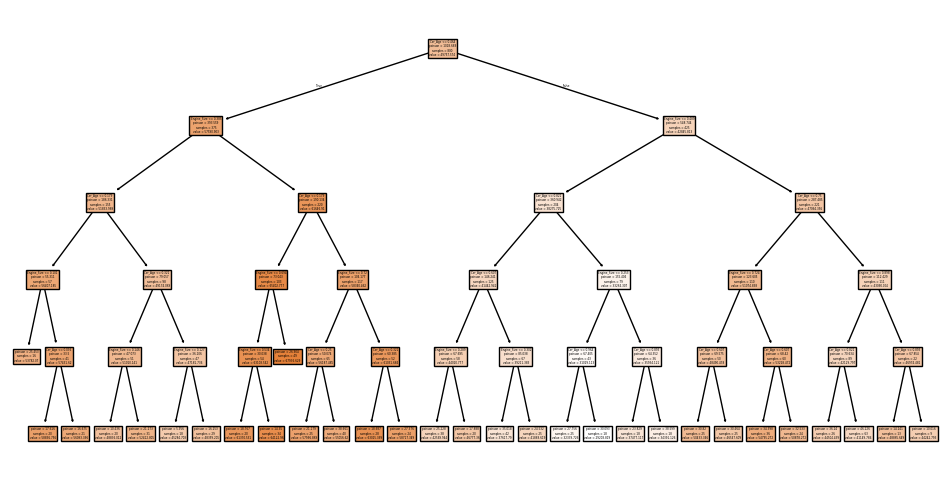

In [327]:
plt.figure(figsize=(12, 6))
plot_tree(best, feature_names=x.columns, filled=True)
plt.show()